# Plots y visualización de los datos

In [12]:
import pandas as pd
import matplotlib.pyplot as plt #para hacer plots de histogramas
import numpy as np #Funciones matemáticas

In [2]:
%config IPCompleter.greedy=True  #Para permitir el autocompletado en Jupyter

In [8]:
#Para poder representar los gráficos dentro de el Notebook:

%matplotlib inline  

Para guardar los plots en archivos:

- savefig:("path_donde_guardar_la_img.jpg")

In [5]:
mainpath = "/Users/irene/Documents/GitHub/python-ml-course/datasets"  #Ruta ficheros
filename1 = "customer-churn-model/Customer Churn Model.txt" #Fichero a abrir
fullpath1 = mainpath + "/" + filename1 #Ruta completa

df1 = pd.read_csv(fullpath1)
df1

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


## 1. Scatter plot

Nube de dispersión (puntos) -> para ver si existe correlación entre 2 variables.

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

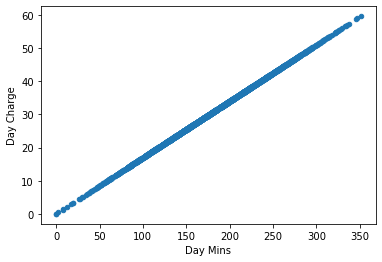

In [9]:
df1.plot(kind="scatter", x="Day Mins", y="Day Charge") #A + carga, + llamadas.

### 1.1. Comparar 4 plots a la vez

Creamos dos variables:
- **figure:** para hacer el dibujo.
- **axs:** para hacer los ejes.

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

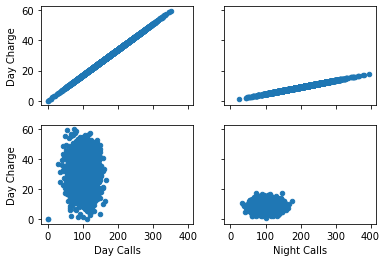

In [10]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True) #Matriz de 2x2, comparten la y y la x

df1.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0]) #subplot posición 0x0
df1.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1]) #subplot posición 0x1
df1.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0]) #subplot posición 1x0
df1.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1]) #subplot posición 1x1

## 2. Histogramas de frecuencias

Para ver cómo se distribuyen los datos (variable numérica) 

bins = nº de divisiones (rangos) en los que queremos subdividir los datos.
- Nº fijo -> "bins=20"
- Indicando dónde están las divisiones -> "bins=[0,30,60,90,120,150,180]"

Text(0.5, 1.0, 'Histograma de nº de llamadas al día')

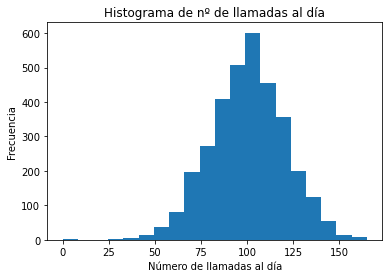

In [14]:
plt.hist(df1["Day Calls"], bins=20) 
plt.xlabel("Número de llamadas al día") #Etiqueta eje X
plt.ylabel("Frecuencia") #Etiqueta eje Y
plt.title("Histograma de nº de llamadas al día") #Título histograma

### 2.1. Usando la Regla de Sturges

Regla de Sturges: indica cuántas divisiones requiere nuestro histograma -> necesitas saber el tamaño de la muestra.

**c = 1 + log2(M)**  donde M es el tamaño de la muestra. Necesitamos la librería **numpy**.

Text(0.5, 1.0, 'Histograma de nº de llamadas al día')

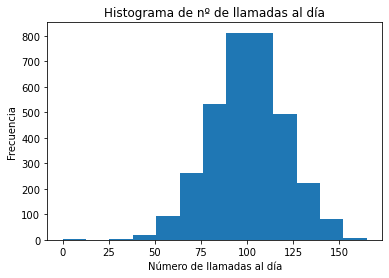

In [15]:
#la función int convierte un decimal en entero
#la función ceil redondea hacia arriba

k = int(np.ceil(1+np.log2(3333))) #Regla de Sturges

plt.hist(df1["Day Calls"], bins=k) 
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de nº de llamadas al día")

## 3. Box plot (diagrama de cajas y bigotes)

Para conocer la distribución numérica:
- **Caja** = donde se condensan la gran mayoría de datos -> 25% - 75% (cuantiles)
- **Línea amarilla** = valor central = mediana o percentil 50%
- **Rango intercuantílico (IQR)** = la diferencia entre el cuantil 75%-25% = 114-87= 27 = tamaño de la caja.
- **Bigotes** 1,5 veces el IQR como **máximo**.
- **Outliers (bolitas)** = todos los datos que superan los bigotes. el borde de los bigotes se llama Outlier.

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

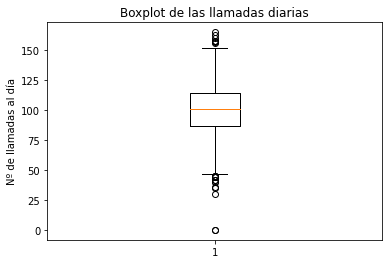

In [16]:
plt.boxplot(df1["Day Calls"])

plt.ylabel("Nº de llamadas al día")
plt.title("Boxplot de las llamadas diarias")

In [90]:
df1["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [17]:
IQR = df1["Day Calls"].quantile(0.75)-df1["Day Calls"].quantile(0.25) #IQR
IQR

27.0

In [18]:
df1["Day Calls"].quantile(0.25) - (1.5)*IQR #Donde empieza el bigote

46.5

In [19]:
df1["Day Calls"].quantile(0.75) + (1.5)*IQR #Donde finaliza el bigote

154.5